# Welcome to the Fashion-MNIST Challenge!

Website reference: https://github.com/zalandoresearch/fashion-mnist

In [1]:
##################################################
# Imports
##################################################

import numpy as np
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt
import time 
import datetime
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
##################################################
# Params
##################################################

DATA_BASE_FOLDER = '../input/imageclassificationfashionmnist/image-classification-fashion-mnist'

In [2]:
def cm(model,x,y):
    plt.figure(figsize=(12,12))
    ax=plt.axes()
    cm=plot_confusion_matrix(model, x,y,display_labels=y_labels,normalize='true',xticks_rotation='vertical',ax=ax)
    plt.show()
    
    
train_time=[]
eval_time=[]
acc=[]

# Dataset

The dataset contains 50k train + 10k validation images of 10 different categories ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot').

Each image is a 28x28 grayscale, and for simplicity here is flattened into a 784 dimensional vector.

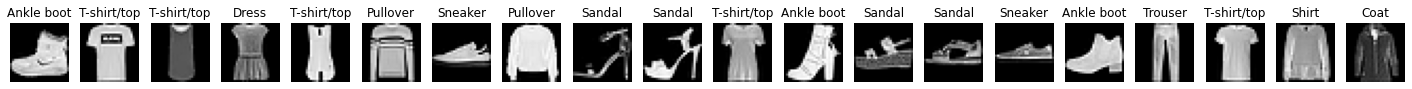

In [3]:
##################################################
# Load dataset
##################################################

x_train = np.load(os.path.join(DATA_BASE_FOLDER, 'train.npy'))
x_valid = np.load(os.path.join(DATA_BASE_FOLDER, 'validation.npy'))
x_test = np.load(os.path.join(DATA_BASE_FOLDER, 'test.npy'))
y_train = pd.read_csv(os.path.join(DATA_BASE_FOLDER, 'train.csv'))['class'].values
y_valid = pd.read_csv(os.path.join(DATA_BASE_FOLDER, 'validation.csv'))['class'].values
y_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot random images of different classes
plt.figure(figsize=(25, 5))
for idx in range(20):
    plt.subplot(1, 20, idx + 1)
    img = x_train[idx].reshape(28, 28)
    plt.title(f'{y_labels[y_train[idx]]}')
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.show()

In [4]:
print ("x_train shape: " + str(x_train.shape))
print ("y_train shape: " + str(y_train.shape))

x_train shape: (50000, 784)
y_train shape: (50000,)


In [5]:
x_train[0]  # pixels

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,
         4,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,
        54,   0,   0,   0,   1,   3,   4,   0,   0,   3,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204,
       176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [6]:
y_train  # labels

array([9, 0, 0, ..., 5, 1, 7])

In [7]:
##################################################
# Process the data here, if needed
##################################################

'''
Any manipulation of the dataset in order to feed the data to the algorithm in the correct "format".
'''
# Normalization of the dataset: the value of a pixel channel is between 0 and 255, so let's divide by 255

x_train_sd = x_train / 255.
x_valid_sd = x_valid / 255.
x_test_sd = x_test / 255.

# Concatenate training and validation set if using cross-validation
x_sd = np.concatenate((x_train_sd, x_valid_sd), axis = 0)
y = np.concatenate((y_train,y_valid))

# One-hot encoding for the labels

y_train_hot = np.eye(10)[y_train]
y_valid_hot = np.eye(10)[y_valid]
# y_test_hot = np.eye(10)[y_test]  y_test is hidden to us

In [8]:
y_train_hot.shape, y_valid_hot.shape, x_train_sd.shape, x_valid_sd.shape

((50000, 10), (10000, 10), (50000, 784), (10000, 784))

In [9]:
x_train_sd[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [10]:
print(x_sd.shape)
print(y.shape)

(60000, 784)
(60000,)


# Evaluation

In [11]:
##################################################
# Evaluate the model here
##################################################

# Use this function to evaluate your model
def accuracy(y_pred, y_true):
    '''
    input y_pred: ndarray of shape (N,)
    input y_true: ndarray of shape (N,)
    '''
    return (1.0 * (y_pred == y_true)).mean()

# Report the accuracy in the train and validation sets.

# Model

Here you have to implement a model (or more models, for finding the most accurate) for classification.

You can use the [`sklearn`](https://scikit-learn.org/stable/) (or optionally other more advanced frameworks such as [`pytorch`](https://pytorch.org/) or [`tensorflow`](https://www.tensorflow.org/)) package that contains a pool of models already implemented that perform classification. (SVMs, NNs, LR, kNN, ...)

# Logistic Regression

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression
Accuracy =  0.8518
Training runtime: 12.230282068252563
Prediction runtime: 0.014890432357788086


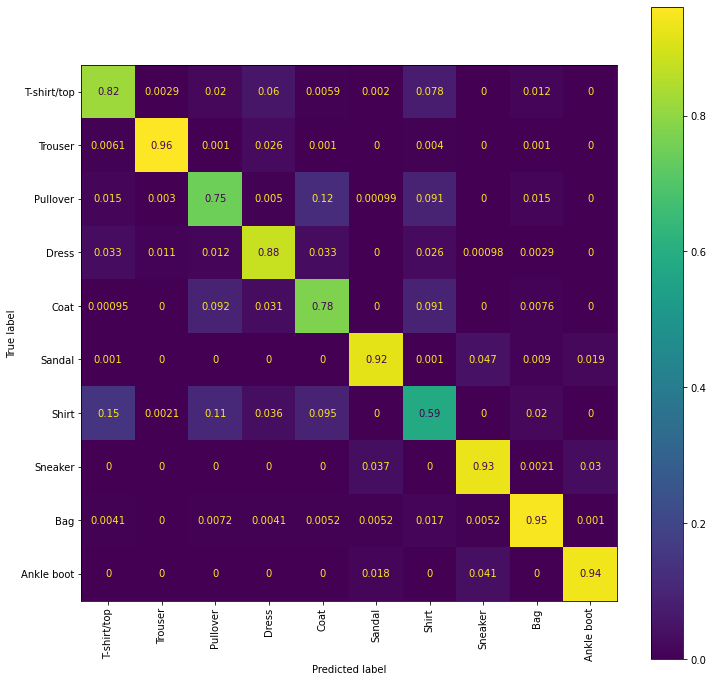

In [12]:
# Logistic Regression without cross validation

t1 = time.time()

# fitting the model
model_logreg = LogisticRegression(multi_class = 'multinomial', max_iter = 80, random_state=0)
model_logreg.fit(x_train_sd, y_train)
t2=time.time()
# predicting it
y_valid_pred1 = model_logreg.predict(x_valid_sd)
t3=time.time()
# printing the outcome
print('Logistic Regression')
print('Accuracy = ',accuracy(y_valid_pred1, y_valid))
print('Training runtime: '+str(t2-t1))
print('Prediction runtime: '+str(t3-t2))

cm(model_logreg,x_valid_sd,y_valid)
train_time.append(t2-t1)
eval_time.append(t3-t2)
acc.append(accuracy(y_valid_pred1, y_valid))

# SVM 

In [13]:
from sklearn.svm import SVC

SVM
Accuracy =  0.8635
Training runtime: 426.44372177124023
Prediction runtime: 183.45663928985596


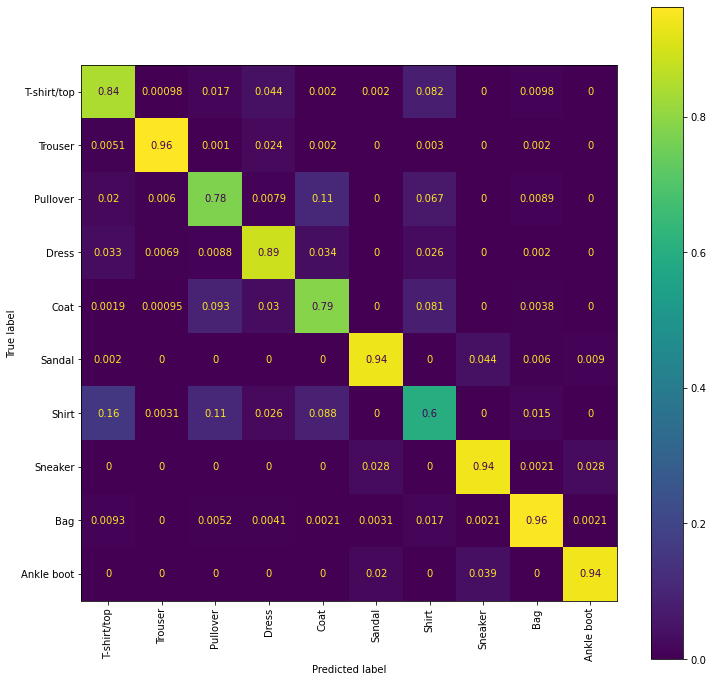

In [14]:
# Setting the kernel to linear

t1 = time.time()

# fitting the model
model_svm = SVC(kernel='linear', C = 0.1)
model_svm.fit(x_train_sd, y_train)
t2=time.time()
# predicting
y_valid_pred4 = model_svm.predict(x_valid_sd)
t3=time.time()
# result
print('SVM')
print('Accuracy = ',accuracy(y_valid_pred4, y_valid))

print('Training runtime: '+str(t2-t1))
print('Prediction runtime: '+str(t3-t2))
cm(model_svm,x_valid_sd,y_valid)
train_time.append(t2-t1)
eval_time.append(t3-t2)
acc.append(accuracy(y_valid_pred4, y_valid))

# Neural Network (NN)


In [15]:
from sklearn.neural_network import MLPClassifier

NN
Accuracy = 0.8863
Training runtime: 462.27706003189087
Prediction runtime: 1.014970064163208


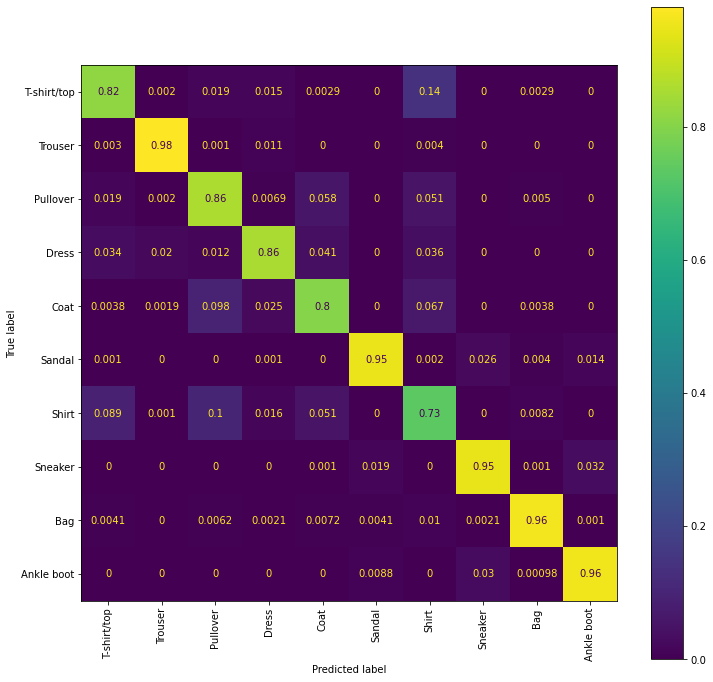

In [16]:
# fitting the model
t1 = time.time()
mlp_classifier = MLPClassifier(hidden_layer_sizes = [100]*5)
mlp_classifier.fit(x_train_sd, y_train)
t2= time.time()
# testing
y_valid_pred6 = mlp_classifier.predict(x_valid_sd)
t3=time.time()
# results
print('NN')
print('Accuracy = '+str(mlp_classifier.score(x_valid_sd, y_valid)))

print('Training runtime: '+str(t2-t1))
print('Prediction runtime: '+str(t3-t2))
cm(mlp_classifier,x_valid_sd,y_valid)
train_time.append(t2-t1)
eval_time.append(t3-t2)
acc.append(accuracy(y_valid_pred6, y_valid))

# k-NN

Accuracy: 0.8537
k-NN
Training runtime: 8.840247392654419
Prediction runtime: 750.5796673297882


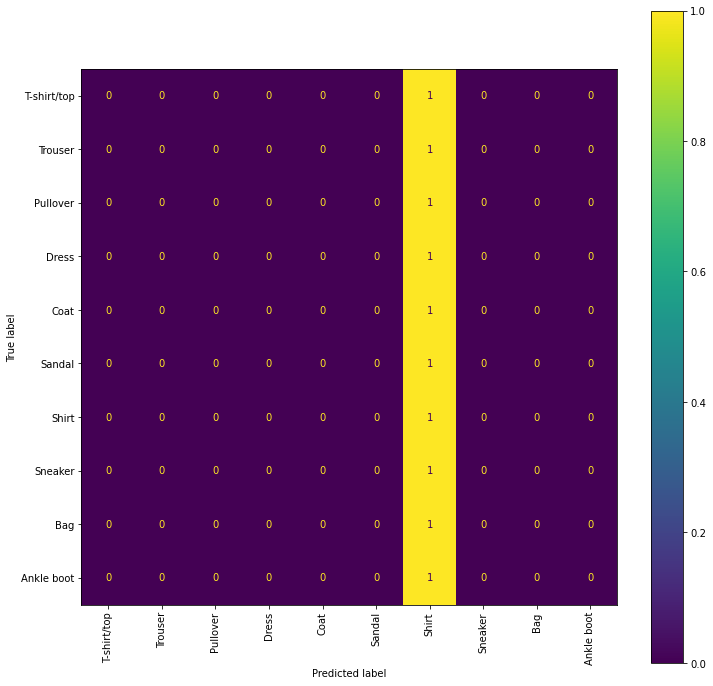

In [17]:
from sklearn.neighbors import KNeighborsClassifier
t1=time.time()

knn = KNeighborsClassifier(weights='distance')
knn.fit(x_train,y_train)
t2=time.time()
score=knn.score(x_valid,y_valid)
print('Accuracy: '+str(score))
t3=time.time()
print('k-NN')
print('Training runtime: '+str(t2-t1))
print('Prediction runtime: '+str(t3-t2))
cm(knn,x_valid_sd,y_valid)
train_time.append(t2-t1)
eval_time.append(t3-t2)
acc.append(score)

# Random Forest Classifier

Accuracy: 0.879
Training runtime: 76.27463126182556
Prediction runtime: 0.3446993827819824


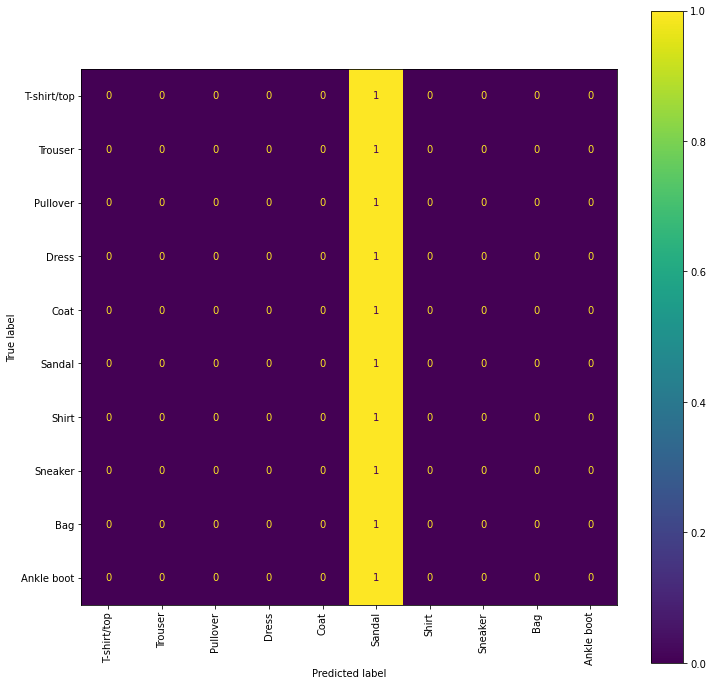

In [18]:
from sklearn.ensemble import RandomForestClassifier
t1=time.time()

rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
t2=time.time()

print('Accuracy: '+str(rfc.score(x_valid,y_valid)))
t3=time.time()
print('Training runtime: '+str(t2-t1))
print('Prediction runtime: '+str(t3-t2))
cm(rfc,x_valid_sd,y_valid)

train_time.append(t2-t1)
eval_time.append(t3-t2)
acc.append(rfc.score(x_valid,y_valid))

# CNN

In [19]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

X_train=x_train_sd.reshape((50000,28,28,1))
X_valid_sd=x_valid_sd.reshape((10000,28,28,1))
x_test_sd=x_test_sd.reshape((10000,28,28,1))
t1=time.time()

d=ImageDataGenerator(rotation_range=5,horizontal_flip=True)
datagen=d.flow(X_train,y_train,batch_size=256)

lr_decay=tf.keras.optimizers.schedules.ExponentialDecay(0.2,5*1960,0.5)

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3],padding='same', activation="swish", input_shape=[28, 28,1]),
    keras.layers.Conv2D(filters=16, kernel_size=[3,3],padding='same', activation="swish", input_shape=[28, 28,32]),
    keras.layers.Conv2D(filters=16, kernel_size=[4,4],padding='same', activation="swish", input_shape=[28, 28,32,16]),
    keras.layers.MaxPool2D(pool_size=[3,3]),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(200, activation="swish",kernel_regularizer=None),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(100, activation="swish"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(50, activation="swish"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(50, activation="swish"),
    keras.layers.Dense(25, activation="swish"),
    keras.layers.Dense(10, activation="softmax")])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=lr_decay),
              metrics=["accuracy"])



callbacks = tf.keras.callbacks.EarlyStopping(patience=30,restore_best_weights=True)


history = model.fit_generator(datagen, epochs=300, 
                    validation_data=(X_valid_sd, y_valid),
                    callbacks=callbacks)
t2=time.time()
scores = model.evaluate(X_valid_sd, y_valid, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
t3=time.time()
print('Training runtime: '+str(t2-t1))
print('Prediction runtime: '+str(t3-t2))
train_time.append(t2-t1)
eval_time.append(t3-t2)
acc.append(scores[1])
PREDICTION=np.argmax(model.predict(x_test_sd),1)

Epoch 1/300
196/196 [==============================] - 10s 51ms/step - loss: 2.2846 - accuracy: 0.1310 - val_loss: 1.9822 - val_accuracy: 0.2101
Epoch 2/300
196/196 [==============================] - 11s 54ms/step - loss: 1.1034 - accuracy: 0.5794 - val_loss: 0.6786 - val_accuracy: 0.7383
Epoch 3/300
196/196 [==============================] - 10s 52ms/step - loss: 0.7068 - accuracy: 0.7258 - val_loss: 0.5240 - val_accuracy: 0.8029
Epoch 4/300
196/196 [==============================] - 11s 55ms/step - loss: 0.5695 - accuracy: 0.7831 - val_loss: 0.4523 - val_accuracy: 0.8264
Epoch 5/300
196/196 [==============================] - 10s 53ms/step - loss: 0.4973 - accuracy: 0.8152 - val_loss: 0.3990 - val_accuracy: 0.8521
Epoch 6/300
196/196 [==============================] - 10s 50ms/step - loss: 0.4601 - accuracy: 0.8336 - val_loss: 0.3763 - val_accuracy: 0.8589
Epoch 7/300
196/196 [==============================] - 10s 53ms/step - loss: 0.4221 - accuracy: 0.8446 - val_loss: 0.3721 - val_ac

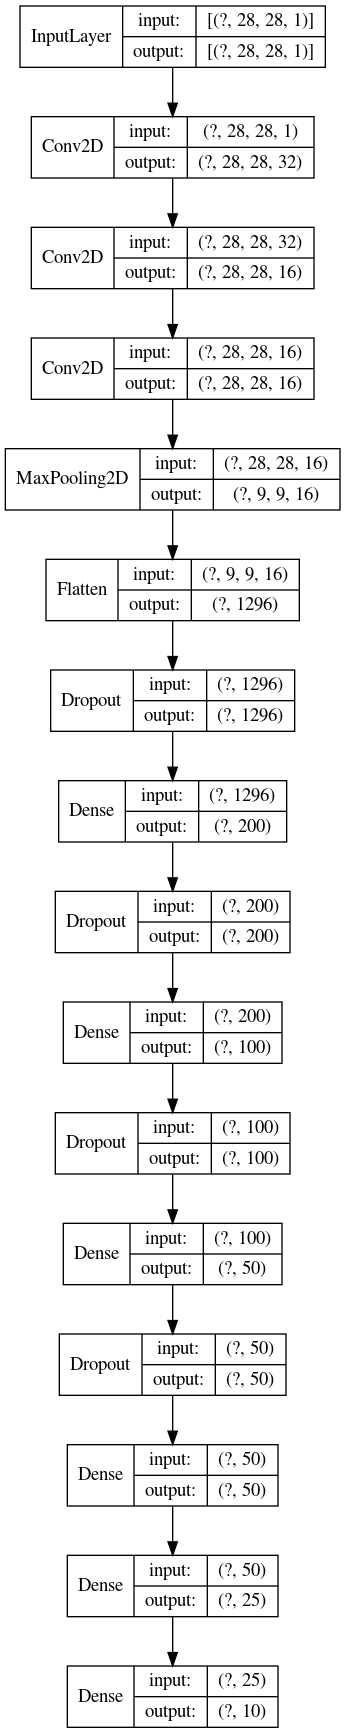

In [20]:
from keras.utils.vis_utils import plot_model
plot_model(model,show_shapes=True,show_layer_names=False)

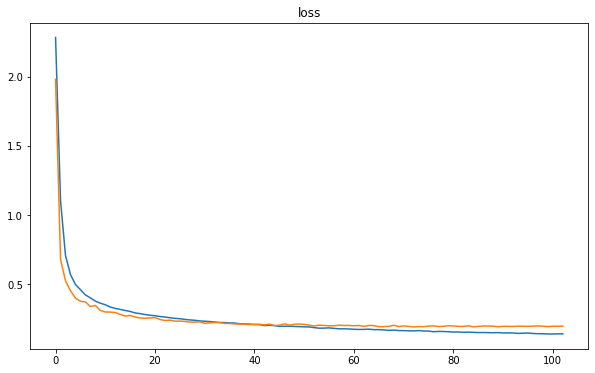

In [21]:
plt.figure(figsize=(10,6))
plt.plot(history.epoch,history.history['loss'])
plt.plot(history.epoch,history.history['val_loss'])
plt.title('loss')
plt.show()

Text(0.5, 1.0, 'accuracy')

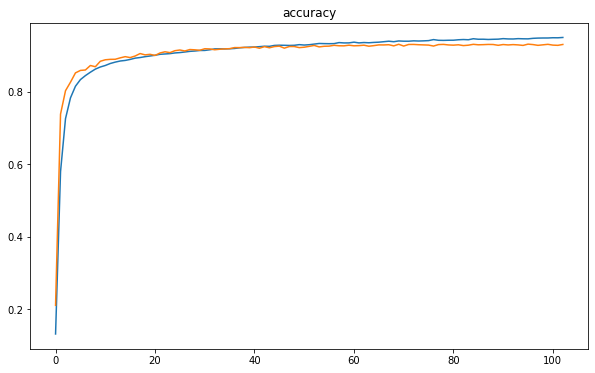

In [22]:
plt.figure(figsize=(10,6))
plt.plot(history.epoch,history.history['accuracy'])
plt.plot(history.epoch,history.history['val_accuracy'])
plt.title('accuracy')

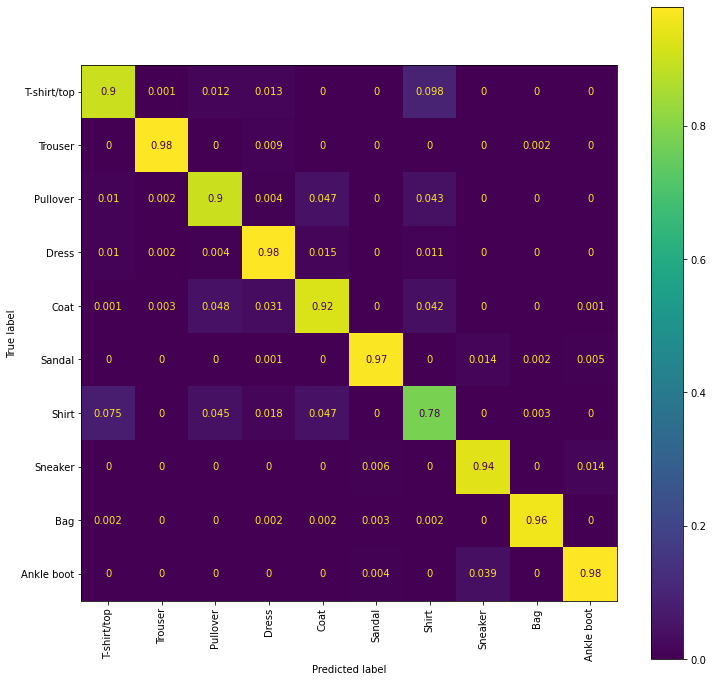

In [23]:
y=model.predict(X_valid_sd)
m=confusion_matrix(y_valid,np.argmax(y,1))
a=ConfusionMatrixDisplay(m/1000,display_labels=y_labels)
plt.figure(figsize=(12,12))
ax=plt.axes()
a.plot(xticks_rotation='vertical',ax=ax)

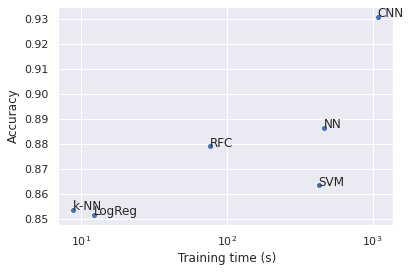

In [24]:
mod_labels=['LogReg','SVM','NN','k-NN','RFC','CNN']
#train_time=[12.97,467.57,219.69,9.29,79.85,7943]
#eval_time=[0.015,196,0.227,830,0.511,4.11]
#acc=[0.8518,0.8635,0.8852,0.8537,0.8806,0.9325]

sns.set()
plt.figure()
ax=plt.axes()
plt.xlabel(' Training time (s)')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.grid(True)
sns.scatterplot(train_time,acc)

for i,name in enumerate(mod_labels):
    ax.annotate(name,(train_time[i],acc[i]))
plt.show()

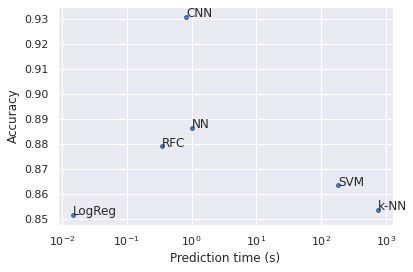

In [25]:
plt.figure()
sns.set()
ax=plt.axes()
sns.scatterplot(eval_time,acc)
plt.xlabel('Prediction time (s)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xscale('log')
for i,name in enumerate(mod_labels):
    ax.annotate(name,(eval_time[i],acc[i]))
plt.show()

# Send the submission for the challenge

In [26]:
##################################################
# Save your test prediction in y_test_pred
##################################################
y_test_pred=PREDICTION

# Create submission
submission = pd.read_csv(os.path.join(DATA_BASE_FOLDER, 'sample_submission.csv'))
if y_test_pred is not None:
    submission['class'] = y_test_pred
submission.to_csv('my_submission.csv', index=False)

In [27]:
submission

,idx,class
0,0,9
1,1,2
2,2,1
3,3,1
4,4,6
...,...,...
9995,9995,9
9996,9996,1
9997,9997,8
9998,9998,1
